<a href="https://colab.research.google.com/github/duynguyen02/ml-on-practice/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['Wholesale customers data.csv']))
import io
df = pd.read_csv('/content/drive/My Drive/Wholesale customers data.csv')

In [41]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [42]:
x = df.loc[:, ['Region',
                 'Fresh']].values
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

In [43]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

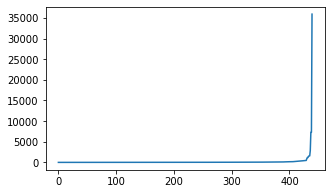

In [44]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [45]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

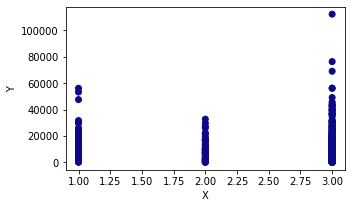

In [46]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("X") # X-axis label
plt.ylabel("Y") # Y-axis label
plt.show() # showing the p

In [47]:
y = df.loc[:, ['Milk',
                 'Fresh']].values
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(y) # fitting the data to the object
distances,indices=nbrs.kneighbors(y) # finding the nearest neighbours

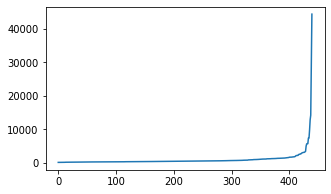

In [26]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [27]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(y) # fitting the model
labels = dbscan.labels_ # getting the labels

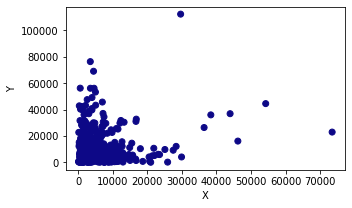

In [28]:
plt.scatter(y[:, 0], y[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("X") # X-axis label
plt.ylabel("Y") # Y-axis label
plt.show() # showing the p

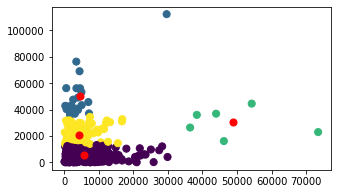

In [57]:
from sklearn.cluster import KMeans
from pandas import DataFrame
df2 = DataFrame(df,columns=['Milk','Fresh'])
kmeans = KMeans(n_clusters=4).fit(df2)
centroids = kmeans.cluster_centers_
plt.scatter(df2['Milk'], df2['Fresh'], c= kmeans.labels_.astype(float), s=50, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

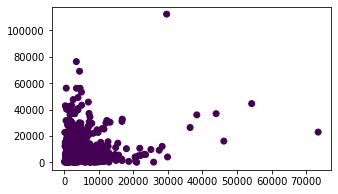

In [64]:
dbscan = DBSCAN(eps= 0.4, min_samples = 10).fit(df2) # fitting the model
labels = dbscan.labels_ # getting the labels
plt.scatter(df2['Milk'],df2['Fresh'], c = labels) # plotting the clusters
plt.show() # showing the p